In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display first five rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Inspect the dataset structure

In [2]:
# Get a summary of dataset
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handle Missing Data

In [3]:
# Identify columns with missing balue (Age, Cabin, Embarked) have missing data
# Fill or remove missing data based on the column type

# Fill missing Age with the median age of the dataset
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop the Cabin column (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# Fill missing Embarked values with most common port, here mode returns the most common value in the dataset.
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


C:\Users\Mukta\AppData\Local\Temp\ipykernel_5988\1555525385.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Mukta\AppData\Local\Temp\ipykernel_5988\1555525385.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Remove Duplicates

In [5]:
# Check for duplicates
print(f"Duplicate Rows : {df.duplicated().sum()}")

# Remove duplicates if any
df.drop_duplicates(inplace=True)

Duplicate Rows : 0


Correct data types

In [ ]:
# Convert Pclass to string 
df['Pclass'] = df['Pclass'].astype(str)

Standardize and Normalize Data

In [ ]:
# Standarize column names to lower case
df.columns = [col.lower() for col in df.columns]

Save the Cleaned Data

In [6]:
df.to_csv('Titanic-Dataset-Cleaned.csv', index=False)

Analyze the Cleaned Data

In [10]:
df.groupby('Sex')['Survived'].count()

<bound method Series.info of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

Data Visualization

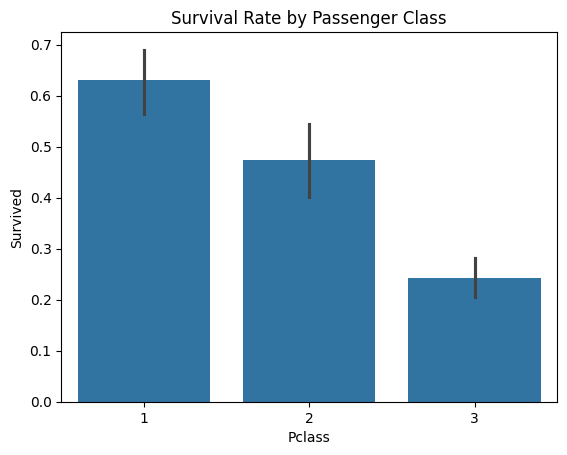

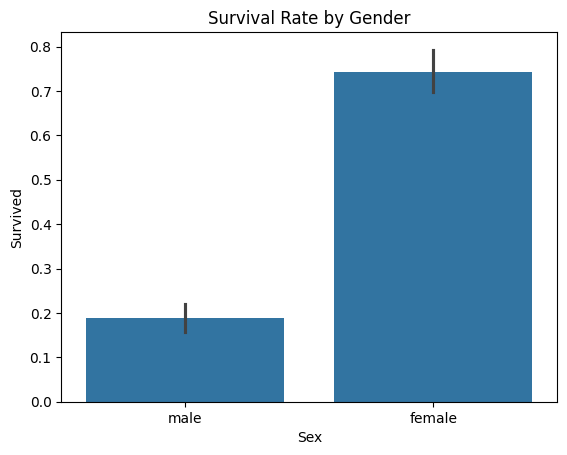

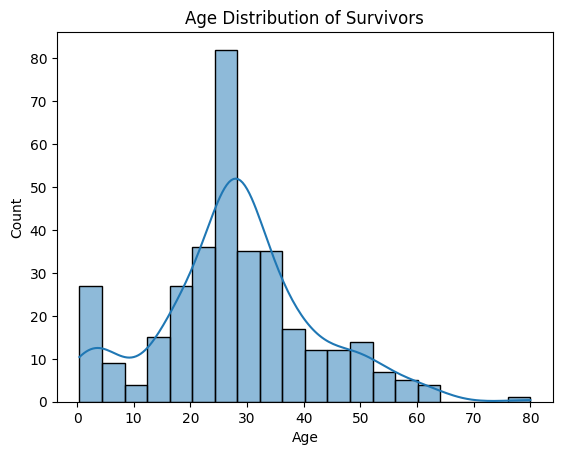

In [16]:
# Plot Survival Rates by Class, Gender or Age

import matplotlib.pyplot as plt
import seaborn as sns

# Plot Survival Rates by Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival Rate by Age, age distribution of survivors
sns.histplot(data=df[df['Survived'] == 1], x= 'Age', bins=20, kde= True)
plt.title('Age Distribution of Survivors')
plt.show()
